In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LinearRegression
%precision %.4f

'%.4f'

In [9]:
df = pd.read_csv('car_price.csv')

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.drop(columns=['car_ID'], inplace=True)
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [14]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


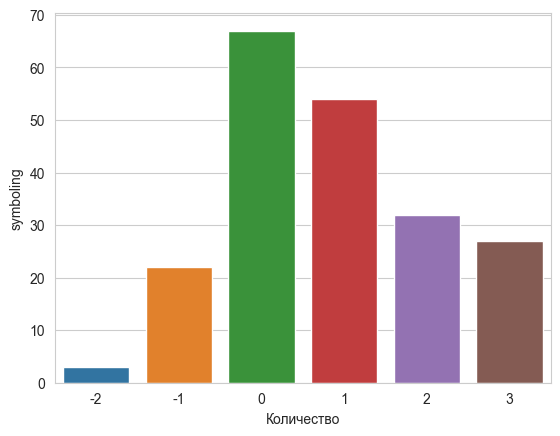

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='symboling',data=df)
plt.xlabel('Количество')
plt.ylabel('symboling')
plt.show()

In [17]:
df["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [18]:
df["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [20]:
df = df.replace(cleanup_nums)

In [21]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


array([[<AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'doornumber'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>],
       [<AxesSubplot: title={'center': 'carwidth'}>,
        <AxesSubplot: title={'center': 'carheight'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'cylindernumber'}>],
       [<AxesSubplot: title={'center': 'enginesize'}>,
        <AxesSubplot: title={'center': 'boreratio'}>,
        <AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'compressionratio'}>],
       [<AxesSubplot: title={'center': 'horsepower'}>,
        <AxesSubplot: title={'center': 'peakrpm'}>,
        <AxesSubplot: title={'center': 'citympg'}>,
        <AxesSubplot: title={'center': 'highwaympg'}>],
       [<AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object

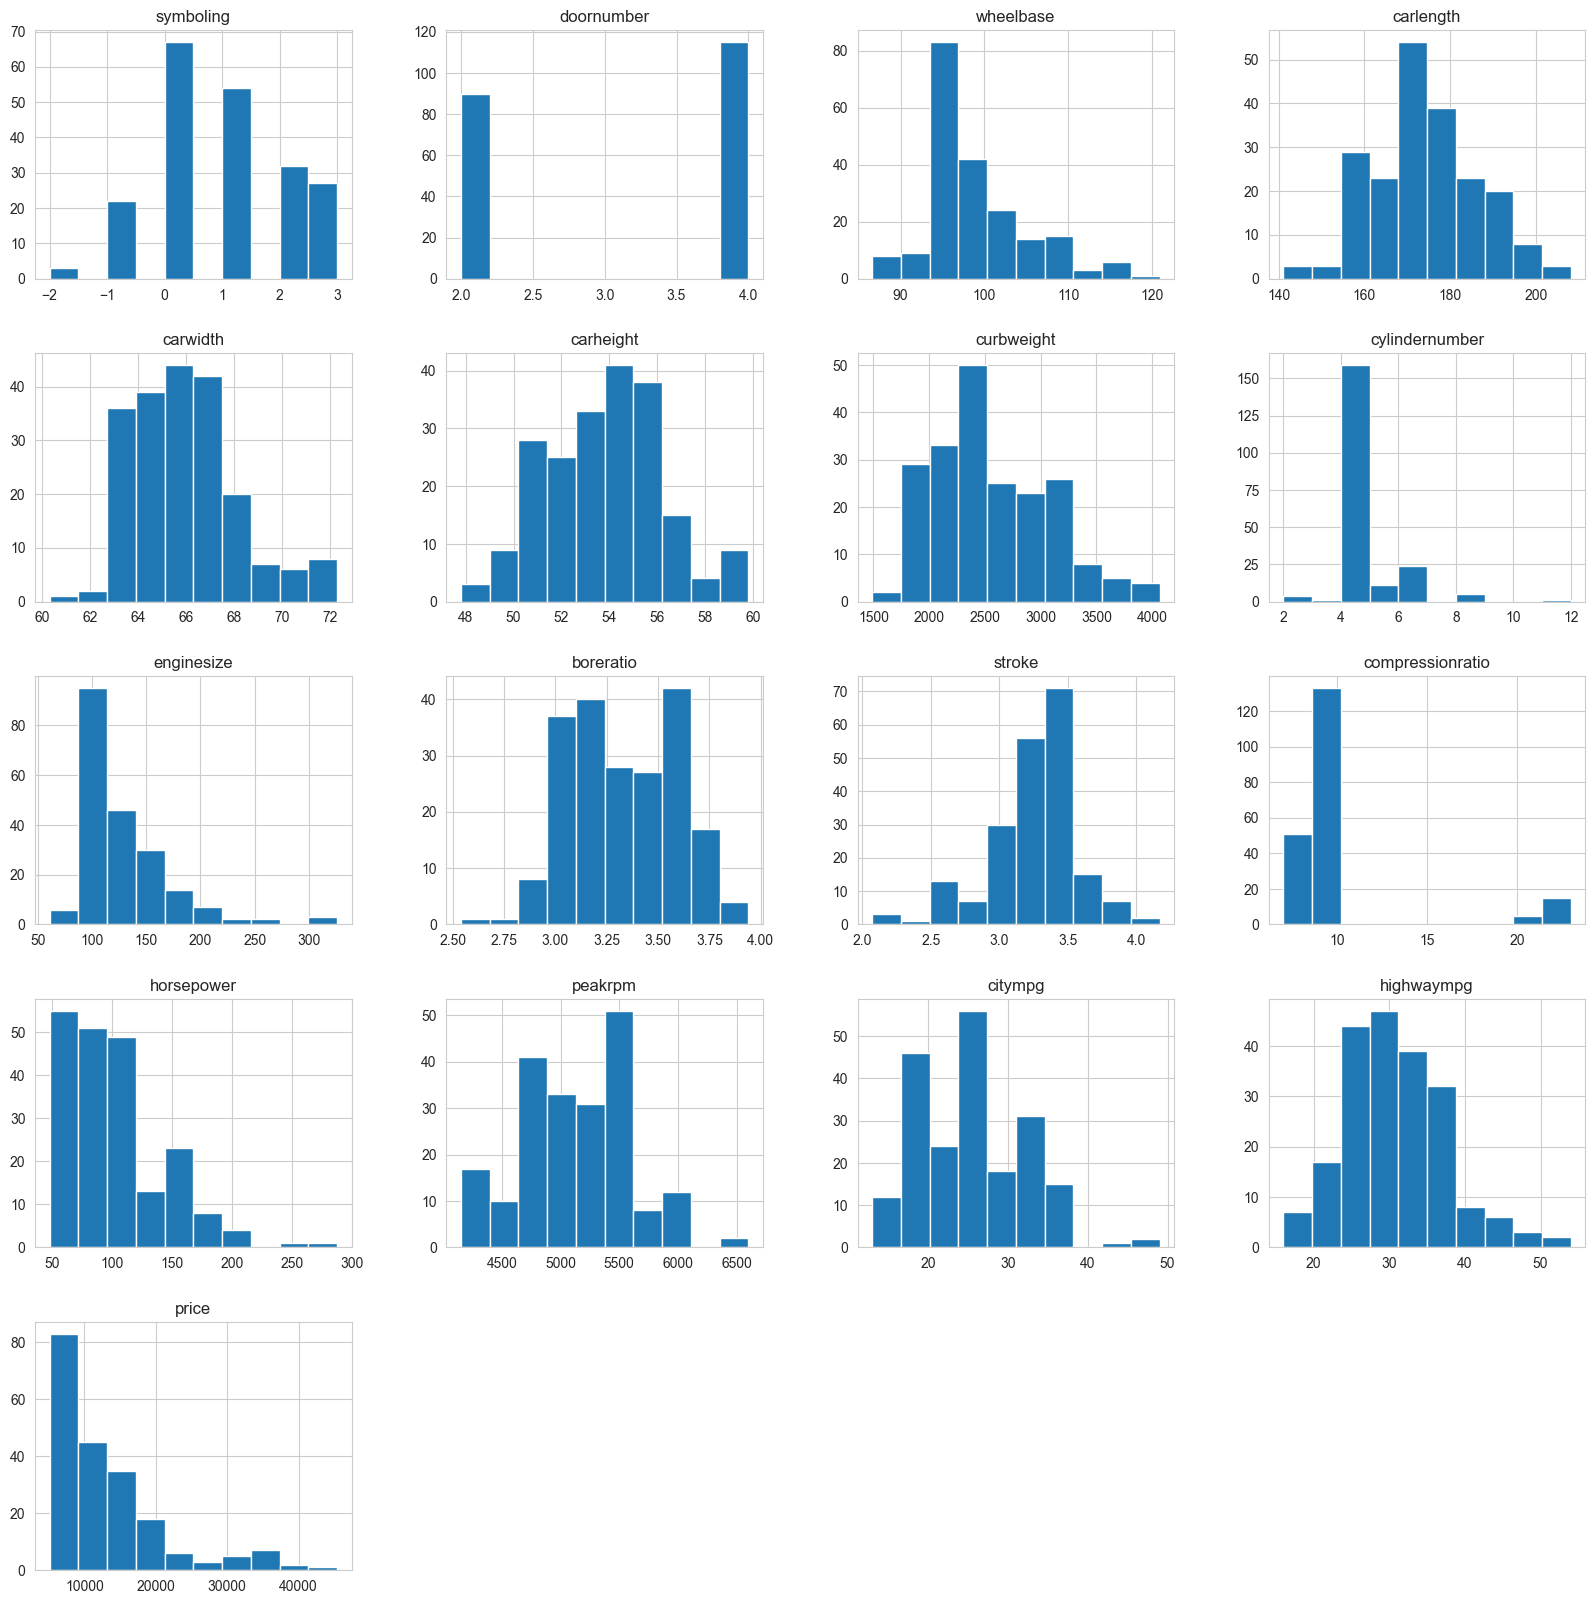

In [22]:
df.hist(figsize =(20,20))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [24]:
X = df.loc[:, df.columns != 'price']
X = X.select_dtypes(include=['float64','int64'])

In [26]:
y = df['price']

In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [28]:
numeric_data = df.select_dtypes([np.number])
numeric_data = numeric_data.loc[:, numeric_data.columns != 'price']
numeric_features = numeric_data.columns

In [29]:
X_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
124,3,2,95.9,173.2,66.3,50.2,2818,4,156,3.59,3.86,7.0,145,5000,19,24
181,-1,4,104.5,187.8,66.5,54.1,3151,6,161,3.27,3.35,9.2,156,5200,19,24
154,0,4,95.7,169.7,63.6,59.1,2290,4,92,3.05,3.03,9.0,62,4800,27,32
53,1,4,93.1,166.8,64.2,54.1,1945,4,91,3.03,3.15,9.0,68,5000,31,38
94,1,2,94.5,165.3,63.8,54.5,1951,4,97,3.15,3.29,9.4,69,5200,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,4,99.1,186.6,66.5,56.1,2695,4,121,3.54,3.07,9.3,110,5250,21,28
137,2,4,99.1,186.6,66.5,56.1,2847,4,121,3.54,3.07,9.0,160,5500,19,26
72,3,2,96.6,180.3,70.5,50.8,3685,8,234,3.46,3.10,8.3,155,4750,16,18
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,8.7,73,4400,26,31


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train[numeric_features])

X_test_scaled = scaler.transform(X_test[numeric_features])


In [31]:
class MyModel():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self


    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [32]:
my_model = MyModel(X_train, Y_train)
my_model.fit()

C:\Users\Corzard\AppData\Local\Temp\ipykernel_6924\1838671431.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.y = y[:, np.newaxis]


In [33]:
my_model.get_params()

array([[13561.71445455],
       [  614.69705424],
       [  532.69552888],
       [  815.49401469],
       [-1984.30669309],
       [ 1601.07020562],
       [  771.70201367],
       [  694.34010935],
       [-1181.87309493],
       [ 6161.32253099],
       [ -601.3196296 ],
       [-1098.43534778],
       [ 1283.28622707],
       [ 1522.14838376],
       [ 1136.26168978],
       [-1268.11798645],
       [  543.10905214]])

In [34]:
y_test_pred = my_model.predict(X_test)
y_train_pred = my_model.predict(X_train)

In [35]:
from sklearn.metrics import mean_squared_error

print("Test RMSE =", mean_squared_error(Y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(Y_train, y_train_pred, squared=False))

Test RMSE = 3420.9144255478063
Train RMSE = 2916.6775984843666


In [36]:
from sklearn.linear_model import Ridge 
model = Ridge()

Text(0, 0.5, 'CV score')

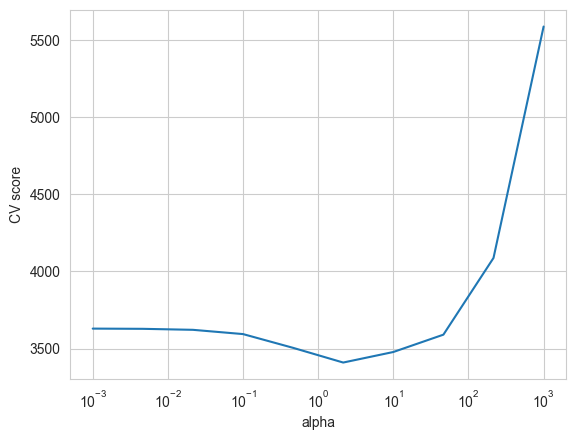

In [37]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, Y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [38]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 2.1544


In [39]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], Y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE =", mean_squared_error(Y_test, y_pred, squared=False))

Test RMSE = 3318.7374671068364


In [40]:
y_Ridge_test_pred = model.predict(X_test)
y_RIdge_train_pred = model.predict(X_train)

In [41]:
print("Test RMSE =", mean_squared_error(Y_test, y_Ridge_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(Y_train, y_RIdge_train_pred, squared=False))

Test RMSE = 3318.7374671068364
Train RMSE = 2933.2958525987115


In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 3540.1841
	3342.4251
	2763.1253
	4255.3211
	3148.2461
Mean CV MSE = 3409.8604
